In [1]:
# import dependencies 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# import csv
df = pd.read_csv('Resources/myopia.csv')

df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# drop MYOPIC column
my_df = df.drop(['MYOPIC'], axis =1)

my_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(my_df[['AGE', 'SPHEQ', 'AL', 
                                        'ACD', 'LT', 'VCD',
                                        'SPORTHR','READHR','COMPHR',
                                        'STUDYHR','TVHR','DIOPTERHR',
                                        'MOMMY','DADMY']])
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [5]:
# Create a DataFrame with the transformed data
new_my = pd.DataFrame(scaled_data,columns=my_df.columns[0:])
new_my.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [6]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
my_pca = pca.fit_transform(new_my)

my_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [7]:
# Transform PCA data to a DataFrame
myo_pca = pd.DataFrame(data=my_pca)
myo_pca

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [8]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [9]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myo_pca)

In [10]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [11]:
tsne_features[:,0]

array([-1.14702320e+01,  1.88973846e+01, -1.60022354e+00, -2.32208672e+01,
       -9.84104443e+00, -2.00463276e+01, -2.05225391e+01,  2.56363678e+00,
        5.59789801e+00, -1.07723150e+01,  1.35705833e+01,  2.48484688e+01,
        1.75584888e+00,  4.91649055e+00, -1.54786987e+01,  2.94400907e+00,
        4.21235037e+00, -1.92787132e+01,  6.36547518e+00, -2.05562162e+00,
       -1.74612160e+01, -1.23732738e+01, -1.52263222e+01, -1.45618200e+01,
       -2.27055531e+01, -9.22929668e+00,  1.54777374e+01, -1.11007290e+01,
        1.93334961e+01, -3.50158715e+00,  1.32889640e+00,  1.73537655e+01,
        2.27673645e+01, -1.97576256e+01, -1.44831295e+01, -1.29659772e+00,
        9.82408810e+00, -1.44619074e+01, -1.14933510e+01, -1.50833597e+01,
        9.41412830e+00,  1.50996768e+00,  1.63784714e+01, -8.09474754e+00,
       -8.90855610e-01, -9.64791489e+00,  1.55788660e+01, -1.00119123e+01,
       -7.46333838e-01,  1.13377638e+01,  1.41256084e+01, -8.41066837e+00,
       -1.32730188e+01,  

In [12]:
# Prepare to plot the dataset

# The first column of transformed features
myo_pca['x'] = tsne_features[:,0]

# The second column of transformed features
myo_pca['y'] = tsne_features[:,1]

In [13]:
label = df['MYOPIC']

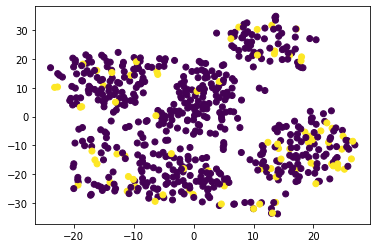

In [14]:
# Visualize the clusters
plt.scatter(myo_pca['x'], myo_pca['y'], c = label)
plt.show()

In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myo_pca)
    inertia.append(km.inertia_)

C:\Users\yhuan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [16]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,286398.832514
1,2,145043.320723
2,3,99926.294145
3,4,65974.889891
4,5,50340.731455
5,6,40694.760428
6,7,35715.852839
7,8,31544.025805
8,9,28222.095054
9,10,25397.034910


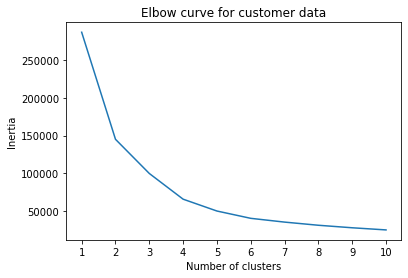

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

# Findings:
At the initial glance at the cluster plot, there appears to have some semblance of having 5 clusters which seems to correspond to the elbow curve where k appears to be 5. However when adding color to the cluster plot label, there doesn't seem to be any distinguishable clusters and the elbow curve doesn't give a definitive number of clusters since the curve doesn't truly flatten. The conclusion from this model is that the patients cannot be clustered. 